**непараметрическая регрессия**

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

In [2]:
n_samples=500

X = np.linspace(-1,2,n_samples).reshape(-1,1)
y = np.sin((X)*2.9)+np.random.rand(n_samples).reshape(-1,1)

X.shape,y.shape


((500, 1), (500, 1))

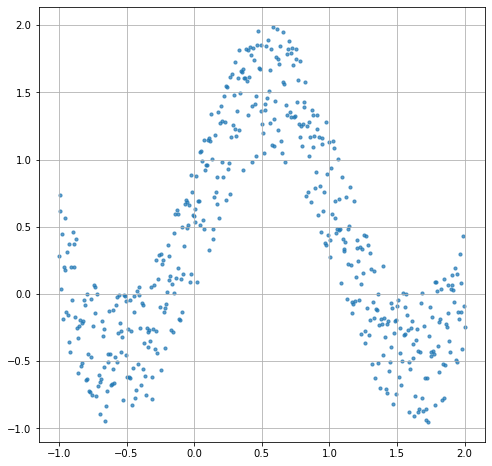

In [3]:
# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
plt.grid()
# plt.savefig('1.png')
plt.show()


---

непараметрическая регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

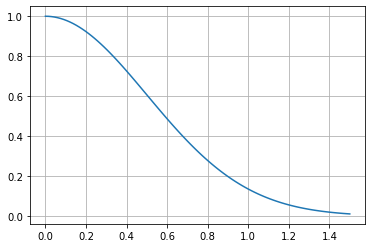

In [4]:
# # прямоугольное ядро
# def K(x): return np.abs(x)<=1.0

# # треугольное ядро
# def K(x): return (1.0-np.abs(x))*(np.abs(x)<=1.0)

# квадратичное ядро (Епанечникова)
#def K(x): return (1.0-np.square(x))*(np.abs(x)<=1.0)
    
# гауссово ядро
def K(x): return np.exp(-2.0*np.square(x))


x = np.linspace(0.0,1.5,100)
plt.plot(x,K(x))
plt.grid()
plt.show()

---

In [5]:
# точки, для которых будем считать регрессию
n = X.shape[0]//10 # количество
u = np.linspace(X.min(),X.max(),n).reshape(-1,1)
u.shape

(50, 1)

---

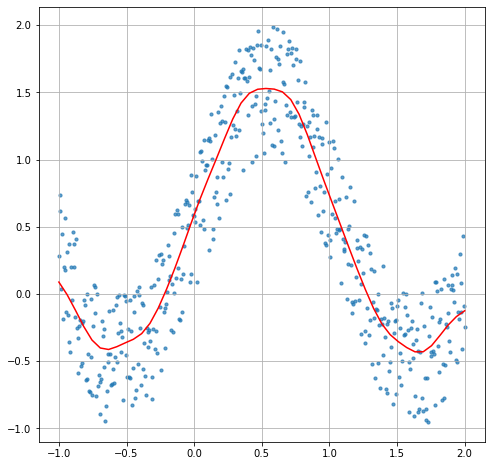

In [6]:
from sklearn.metrics import pairwise_distances

r=pairwise_distances(u,X,metric='euclidean') 
#r/=r.max() #нормируем матрицу расстояний

h = .2 # ширина окна, влияет на точность аппроксимации
w = K(r/h) # влияет на на гладкость аппроксимации
z = (y.T*w).sum(axis=1)/w.sum(axis=1)

# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter(x=X,y=y,s=10,alpha=0.7) # точки учебного набора
plt.plot(u,z,c='r') # точки учебного набора
plt.grid()
plt.show()

---

---

**данные для самостоятельных экспериментов**

база данных параметров погоды

In [1]:
!wget -c https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2020-09-16 17:56:04--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся s3.amazonaws.com (s3.amazonaws.com)… 52.216.233.181
Подключение к s3.amazonaws.com (s3.amazonaws.com)|52.216.233.181|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 13568290 (13M) [application/zip]
Сохранение в: «jena_climate_2009_2016.csv.zip»

jena_climate_2009_2 100%[===================>]  12,94M   278KB/s    за 54s     

2020-09-16 17:56:59 (244 KB/s) - «jena_climate_2009_2016.csv.zip» сохранён [13568290/13568290]



In [14]:
import pandas as pd

df = pd.read_csv('jena_climate_2009_2016.csv.zip')
print(len(df))

420551


In [15]:
df.dtypes

Date Time           object
p (mbar)           float64
T (degC)           float64
Tpot (K)           float64
Tdew (degC)        float64
rh (%)             float64
VPmax (mbar)       float64
VPact (mbar)       float64
VPdef (mbar)       float64
sh (g/kg)          float64
H2OC (mmol/mol)    float64
rho (g/m**3)       float64
wv (m/s)           float64
max. wv (m/s)      float64
wd (deg)           float64
dtype: object

In [16]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [36]:
df['wv (m/s)'] = df['wv (m/s)'].apply(lambda x: max(0.,x) )
df['max. wv (m/s)'] = df['max. wv (m/s)'].apply(lambda x: max(0.,x) )

<AxesSubplot:xlabel='Date Time'>

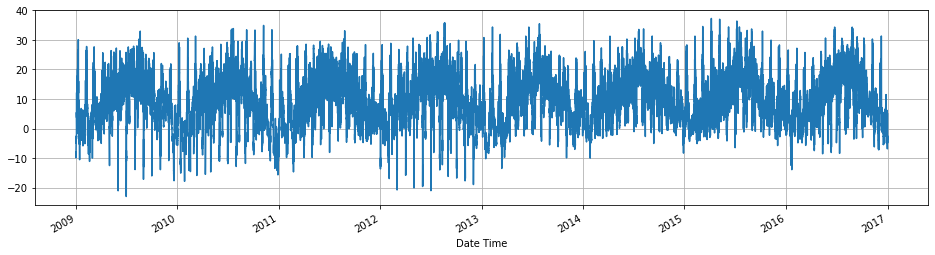

In [50]:
df.set_index('Date Time')['T (degC)'].plot(
    figsize=(16,4),
    grid=True,
)

In [79]:
# преобразование pandas-таблицы в numpy-матрицу
X = df.iloc[:,1:].values
X.shape

(420551, 14)